In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_learn = pd.read_csv('df_learn.csv')
df_baseline = pd.read_csv('df_baseline.csv')
df_relearn = pd.read_csv('df_relearn.csv')
df_unlearn = pd.read_csv('df_unlearn.csv')
df_allphases = pd.read_csv('df_allphases.csv')


,target_x,target_y,p_id,avg errors,trial,block,Rotation,Emphasis,init errors,phase,trial no,block no
0,0.3,-0.3,641,NaN,0.0,0.0,Gradual,Accuracy,0.415961,Baseline,0,1
1,-0.3,0.3,641,NaN,1.0,0.0,Gradual,Accuracy,0.131428,Baseline,1,1
2,0.3,-0.3,641,NaN,2.0,0.0,Gradual,Accuracy,0.206181,Baseline,2,1
3,0.3,-0.3,641,NaN,3.0,0.0,Gradual,Accuracy,0.206181,Baseline,3,1
4,-0.3,0.3,641,NaN,4.0,0.0,Gradual,Accuracy,0.495885,Baseline,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43643,0.3,-0.3,702,0.402465,123.0,1.0,Sudden,Speed,1.203681,Relearning,699,10
43644,0.3,0.3,702,0.827459,124.0,1.0,Sudden,Speed,0.704598,Relearning,700,10
43645,0.3,0.3,702,0.827459,125.0,1.0,Sudden,Speed,0.704598,Relearning,701,10
43646,-0.3,-0.3,702,0.715479,126.0,1.0,Sudden,Speed,1.933589,Relearning,702,10


In [8]:
def extract_blockwise(df):
    # # Drop columns: 'cursor trajectory', 'target_x', 'target_y'
    df = df.drop(columns=['cursor trajectory', 'target_x', 'target_y'])
    # # Performed 2 aggregations grouped on columns: 'p_id', 'block' and 2 other columns
    df = df.groupby(['p_id', 'block', 'Rotation', 'Emphasis']).agg(avgerrors_mean=('avg errors', 'mean'), initerrors_mean=('init errors', 'mean')).reset_index()
    # For all phases file, columns are a bit different. Uncomment below comment above
    # df = df.groupby(['p_id', 'block no', 'Rotation', 'Emphasis']).agg(avgerrors_mean=('avg errors', 'mean'), initerrors_mean=('init errors', 'mean')).reset_index()

    return df

df_learn_blockwise = extract_blockwise(df_learn.copy())
df_unlearn_blockwise = extract_blockwise(df_unlearn.copy())
df_relearn_blockwise = extract_blockwise(df_relearn.copy())
# df_allphases_blockwise = extract_blockwise(df_allphases.copy())

# df_learn_blockwise = extract_blockwise(df_learn.copy())


In [7]:
df_allphases_blockwise['block_no'] = df_allphases_blockwise['block no']

In [39]:
sns.set(font_scale = 2)
sns.set_style('white')
colors = [  '#808A87', '#292421',]
sns.set_palette(sns.color_palette(colors))


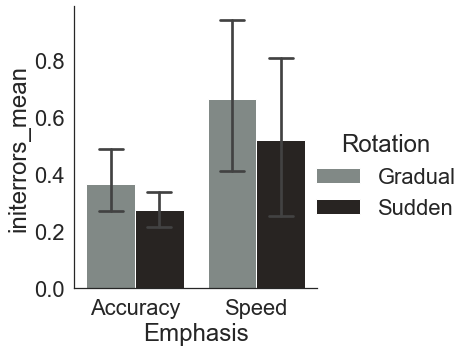

In [9]:
sns.catplot(x = 'Emphasis', hue = 'Rotation', y = 'initerrors_mean', 
            data = df_learn_blockwise.loc[df_learn_blockwise['block']==6],
            kind = 'bar', capsize = 0.2, hue_order=['Gradual', 'Sudden'] 
            )

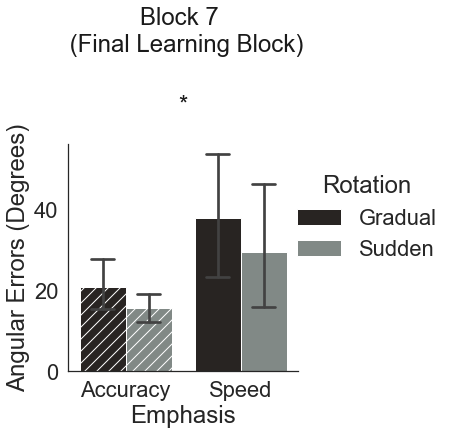

In [17]:
df_allphases_blockwise['initerrors_mean_degrees'] = df_allphases_blockwise['initerrors_mean']*180/np.pi
g = sns.catplot(x = 'Emphasis', hue = 'Rotation', y = 'initerrors_mean_degrees', col = 'block no',
            data = df_allphases_blockwise.loc[((df_allphases_blockwise['block no']==7))],
            kind = 'bar', capsize = 0.2, hue_order=['Gradual', 'Sudden'] 
            )
x1, x2 = 0, 1
y, h, col = df_allphases_blockwise.loc[(df_allphases_blockwise['block no'] == 6)]['initerrors_mean_degrees'].max()-35, 0.02, 'k'
plt.text(0.5, y+h, "Block 7 \n (Final Learning Block)", ha='center', va='bottom', color=col)
plt.text(0.5, y+h-15, "*", ha='center', va='bottom', color=col)

g.set(ylabel='Angular Errors (Degrees)')
g.set(title=None)

# g.set_yl
hatches = ['//', '', '//', '']
for ax in g.axes.flat:
    patches = [patch for patch in ax.patches]
    for i, patch in enumerate(patches):
        patch.set_hatch(hatches[i])


In [21]:
model = ols(
    'initerrors_mean ~ C(Rotation) * C(Emphasis)', data=df_allphases_blockwise.loc[((df_allphases_blockwise['block_no']==9))]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Rotation),0.091086,1.0,0.644979,0.425192
C(Emphasis),0.036064,1.0,0.255371,0.615233
C(Rotation):C(Emphasis),0.007828,1.0,0.055431,0.814699
Residual,8.190941,58.0,NaN,NaN


In [95]:
df_allphases_blockwise.loc[((df_allphases_blockwise['block no']==6) | (df_allphases_blockwise['block no']==8))]

,p_id,block no,Rotation,Emphasis,avgerrors_mean,initerrors_mean
6,641,6,Gradual,Accuracy,0.180313,0.175540
8,641,8,Gradual,Accuracy,0.228178,0.245715
16,642,6,Sudden,Speed,0.524588,1.059229
18,642,8,Sudden,Speed,0.596091,1.207834
26,643,6,Gradual,Speed,0.370462,0.403212
...,...,...,...,...,...,...
598,700,8,Sudden,Accuracy,0.322868,0.386390
606,701,6,Gradual,Accuracy,0.212736,0.222786
608,701,8,Gradual,Accuracy,0.242725,0.363516
616,702,6,Sudden,Speed,0.586386,1.470861


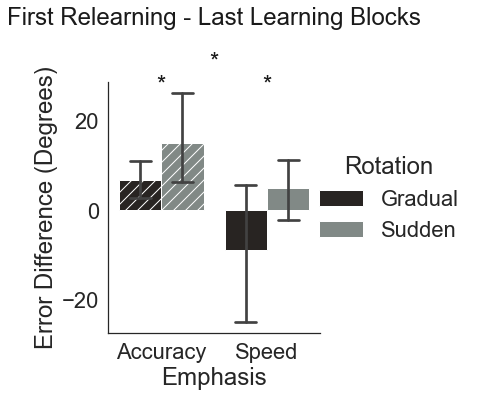

In [132]:
df_allphases_blockwise['difference_2'] = df_allphases_blockwise['initerrors_mean'].diff(periods= 2)*180/np.pi

g = sns.catplot(y = 'difference_2', x = 'Emphasis', hue = 'Rotation', 
            data = df_allphases_blockwise.loc[((df_allphases_blockwise['block no'] == 8))], 
            kind = 'bar', capsize = 0.2)
    
# g.set_ylabels('Error Difference \n Relearning - Learning')
x1, x2 = 0, 1
y, h, col = df_allphases_blockwise.loc[(df_allphases_blockwise['block no'] == 6)]['difference_2'].max()+0.1, 0.02, 'k'
plt.text(0.5, y+h, "First Relearning - Last Learning Blocks", ha='center', va='bottom', color=col)
plt.text(0.5, y+h-10, "*", ha='center', va='bottom', color=col)

plt.text(0, y+h-15, "*", ha='center', va='bottom', color=col)
plt.text(1, y+h-15, "*", ha='center', va='bottom', color=col)

g.set(ylabel='Error Difference (Degrees)')
g.set(title=None)

# g.set_yl
hatches = ['//', '', '//', '']
for ax in g.axes.flat:
    patches = [patch for patch in ax.patches]
    for i, patch in enumerate(patches):
        patch.set_hatch(hatches[i])



In [12]:
df_allphases['init_errors_degrees'] = df_allphases['init errors']*180/np.pi

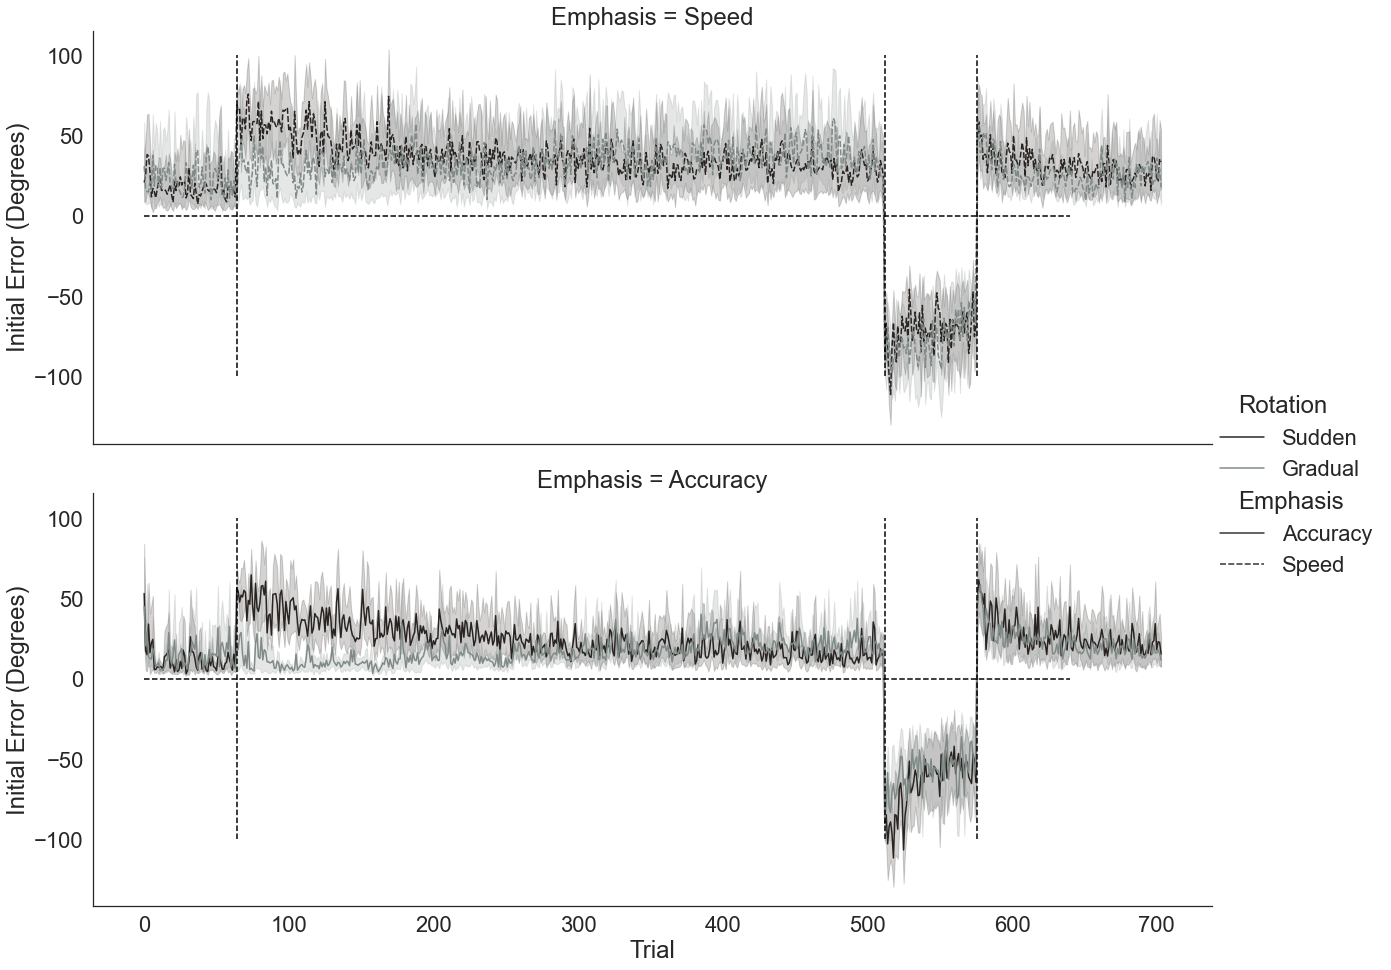

In [16]:
sns.set_context('talk')
sns.set(font_scale = 2)
sns.set_style('white')
colors = [ '#292421', '#808A87']
sns.set_palette(sns.color_palette(colors))

g = sns.relplot(x = 'trial no', y = 'init_errors_degrees', hue = 'Rotation', row = 'Emphasis', style='Emphasis', 
                 style_order=['Accuracy', 'Speed'], hue_order=['Sudden', 'Gradual'], row_order=['Speed', 'Accuracy'],
            data = df_allphases, height = 7, aspect = 2.5, kind = 'line')
g.set_axis_labels('Trial', 'Initial Error (Degrees)')

# draw lines:
for ax in g.axes.ravel():
    ax.vlines(x = 64, ymax=100, ymin = -100, color = 'black', linestyles = '--')
    ax.vlines(x = 64*8, ymax=100, ymin = -100, color = 'black', linestyles = '--')
    ax.vlines(x = 64*9, ymax=100, ymin = -100, color = 'black', linestyles = '--')

    ax.hlines(y=0, xmin = 0, xmax = 640, color = 'black', linestyles = '--')

In [48]:
df_allphases_blockwise['difference_2'] = df_allphases_blockwise['initerrors_mean'].diff(periods= 2)

model = ols(
    'difference_2 ~ C(Rotation) * C(Emphasis)', data=df_allphases_blockwise.loc[((df_allphases_blockwise['block_no']==9))]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Rotation),0.585699,1.0,4.693283,0.034403
C(Emphasis),0.769121,1.0,6.163071,0.015960
C(Rotation):C(Emphasis),0.035977,1.0,0.288291,0.593372
Residual,7.238119,58.0,NaN,NaN


In [49]:
df_allphases_blockwise['Condition'] = df_allphases_blockwise['Rotation'] + ' ' + df_allphases_blockwise['Emphasis']

In [53]:
gs_diff = df_allphases_blockwise.loc[((df_allphases_blockwise['block_no']==9) & ((df_allphases_blockwise['Condition']=='Gradual Speed'))), 'difference_2'].values
oth_diff = df_allphases_blockwise.loc[((df_allphases_blockwise['block_no']==9) & ((df_allphases_blockwise['Condition']!='Gradual Speed'))), 'difference_2'].values


In [54]:
stat.ttest_ind(gs_diff, oth_diff)

Ttest_indResult(statistic=-2.937093879179875, pvalue=0.004693426975527388)

Ttest_indResult(statistic=-0.3121275428229754, pvalue=0.7560257407357927)

In [ ]:
stat.ttest_ind_from_stats()

In [57]:
single_fits = pd.read_csv('model_results/single_fit_initerror_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)
dual_fits = pd.read_csv('model_results/dual_fit_initerror_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)
single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [59]:
single_fits['Learning x Retention'] = single_fits['A'] * single_fits['B']
dual_fits['Fast Learning x Retention'] = dual_fits['Af'] * dual_fits['Bf']
dual_fits['Slow Learning x Retention'] = dual_fits['As'] * dual_fits['Bs']



In [117]:
improv_rate = pd.DataFrame({'pid': single_fits['p_id'],
                            'Single': single_fits['Learning x Retention'],
                           'Fast': dual_fits['Fast Learning x Retention'],
                           'Slow': dual_fits['Slow Learning x Retention'],
                           'Condition': single_fits['Condition']   
                           }                         
                           )
improv_rate_ratio = improv_rate.copy()
improv_rate_ratio['Fast - Slow'] = improv_rate_ratio['Fast'] - improv_rate_ratio['Slow'] 
improv_rate_ratio = improv_rate_ratio.drop(['Single', 'Fast', 'Slow'], axis = 1)

improv_rate_melt = improv_rate.melt(id_vars= ['pid', 'Condition'], value_name='Learning x Retention', var_name='State')
# improv_rate_ratio_melt = improv_rate.melt(id_vars= ['pid', 'Condition'], value_name='Learning x Retention', var_name='State')


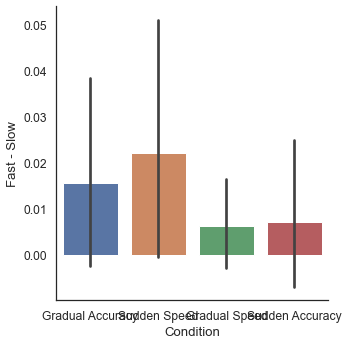

In [118]:
sns.catplot(x = 'Condition', y = 'Fast - Slow', 
            data = improv_rate_ratio, kind = 'bar')

In [106]:
improv_rate_melt

,pid,Condition,State,Learning x Retention
0,641,Gradual Accuracy,Single,0.051518
1,642,Sudden Speed,Single,0.000000
2,643,Gradual Speed,Single,0.008926
3,644,Sudden Accuracy,Single,0.002422
4,645,Gradual Accuracy,Single,0.176941
...,...,...,...,...
243,698,Sudden Speed,Fast_by_Slow,0.000000
244,699,Gradual Speed,Fast_by_Slow,0.000000
245,700,Sudden Accuracy,Fast_by_Slow,3.427449
246,701,Gradual Accuracy,Fast_by_Slow,0.000000


In [85]:
grand_mean = improv_rate_melt['Learning x Retention'].mean()
improv_rate_melt_adj = improv_rate_melt.set_index('pid').join(grand_mean - improv_rate_melt.groupby('pid').mean(), rsuffix='_adjustment_factor').reset_index()

improv_rate_melt_adj['Learning x Retention adjusted'] = improv_rate_melt_adj['Learning x Retention'] + improv_rate_melt_adj['Learning x Retention_adjustment_factor']

C:\Users\tejas\AppData\Local\Temp\ipykernel_23852\1865356961.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  improv_rate_melt_adj = improv_rate_melt.set_index('pid').join(grand_mean - improv_rate_melt.groupby('pid').mean(), rsuffix='_adjustment_factor').reset_index()


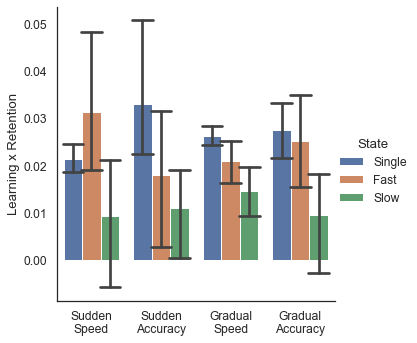

In [99]:
sns.set_palette(sns.color_palette("tab10"))
sns.set(font_scale = 1.1)
sns.set_style('white')

g = sns.catplot(x = 'Condition', y = 'Learning x Retention adjusted', hue = 'State', 
            data = improv_rate_melt_adj, 
            kind = 'bar', capsize = 0.3, order = ['Sudden Speed', 'Sudden Accuracy', 'Gradual Speed', 'Gradual Accuracy']
            )
g.set(xlabel = None)
g.set_xticklabels(['Sudden\nSpeed', 'Sudden\nAccuracy', 'Gradual\nSpeed', 'Gradual\nAccuracy'])
g.set(ylabel = 'Learning x Retention')

In [104]:
cond = 'Sudden Accuracy'
comp = 'Fast'
stat.ttest_rel(improv_rate_melt_adj.loc[((improv_rate_melt_adj['Condition'] == cond) & (improv_rate_melt_adj['State'] == 'Single')), 'Learning x Retention adjusted'], improv_rate_melt_adj.loc[((improv_rate_melt_adj['Condition'] == cond) & (improv_rate_melt_adj['State'] == comp)), 'Learning x Retention adjusted'])

TtestResult(statistic=1.0491871113296547, pvalue=0.3118672746695909, df=14)

# Produce the performance - report plot

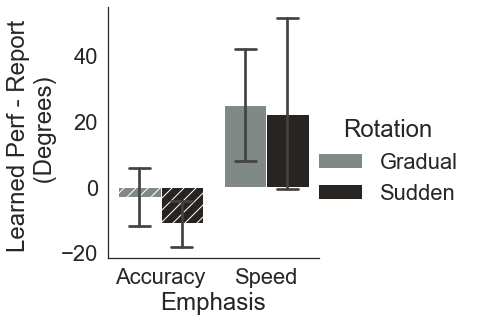

In [59]:
df_aim = pd.read_csv('df_aim.csv')
def clean_data(df_aim):
    # Performed 2 aggregations grouped on columns: 'p_id', 'Rotation', 'Emphasis'
    df_aim = df_aim.groupby(['p_id', 'Rotation', 'Emphasis']).agg(optimalreportreport_mean_mean=('optimalreportreport_mean', 'mean'), optimalreportswipe_mean_mean=('optimalreportswipe_mean', 'mean')).reset_index()
    return df_aim

df_aim_clean = clean_data(df_aim.copy())
df_aim_clean['perf'] = -180*df_learn_blockwise.loc[df_learn_blockwise['block'] == 6, 'initerrors_mean'].values/np.pi
df_aim_clean['perf - report'] = 60-df_aim_clean['perf'] - (60 - df_aim_clean['optimalreportreport_mean_mean'])
df_aim_clean['perf - swipe'] = (60 - df_aim_clean['perf']) - (60 - df_aim_clean['optimalreportswipe_mean_mean'])

g = sns.catplot(y = 'perf - report', x = 'Emphasis', hue = 'Rotation', 
            data = df_aim_clean, 
            kind = 'bar', capsize = 0.2)
    
# g.set_ylabels('Error Difference \n Relearning - Learning')
x1, x2 = 0, 1
# y, h, col = df_allphases_blockwise.loc[(df_allphases_blockwise['block no'] == 6)]['difference_2'].max()+0.1, 0.02, 'k'
# plt.text(0.5, y+h, "First Relearning - Last Learning Blocks", ha='center', va='bottom', color=col)
# plt.text(0.5, y+h-10, "*", ha='center', va='bottom', color=col)

# plt.text(0, y+h-15, "*", ha='center', va='bottom', color=col)
# plt.text(1, y+h-15, "*", ha='center', va='bottom', color=col)

g.set(ylabel='Learned Perf - Report \n (Degrees)')
g.set(title=None)

# g.set_yl
hatches = ['//', '', '//', '']
for ax in g.axes.flat:
    patches = [patch for patch in ax.patches]
    for i, patch in enumerate(patches):
        patch.set_hatch(hatches[i])

